## ***ASSIGNMENT 5 - MARKETING ANALYTICS - Elise Deyris***

## Descriptive analysis: Load the csv files and answer the following questions based on the training data: (2.5 points)
- Question 1a. $\color{#00a6ff}{\text{What is the observed CTR in the data and the average of the users’past click through rate (ctruser)? Are these numbers as expected? Why or why not? (0.5 points)}}$

In [105]:
import pandas as pd

# loading the CSV files
train_data_path = 'Variety Train Data.csv'
test_data_path = 'Variety Test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# calculating observed CTR
observed_ctr = train_data['click'].mean()

# calculating the average of ctruser
average_ctruser = train_data['ctruser'].mean()

observed_ctr, average_ctruser


(0.11341118467834964, 0.1164985249083482)

CTR in the training data is approximately `11.34%`, and the average of the users' past click-through rates (ctruser) is approximately `11.65%`.
These values are close to each other, which aligns with expectations. Since ctruser represents the historical average CTR for users, it serves as a baseline for predicting future CTRs. The slight difference might reflect variations in user behavior or differences between historical and current data patterns.

- Question 1b. $\color{#00a6ff}{\text{Plot the histograms of in-session variety (variety),and pre-session variety (varietytotal). What do you infer from the plots? (0.5 points)}}$

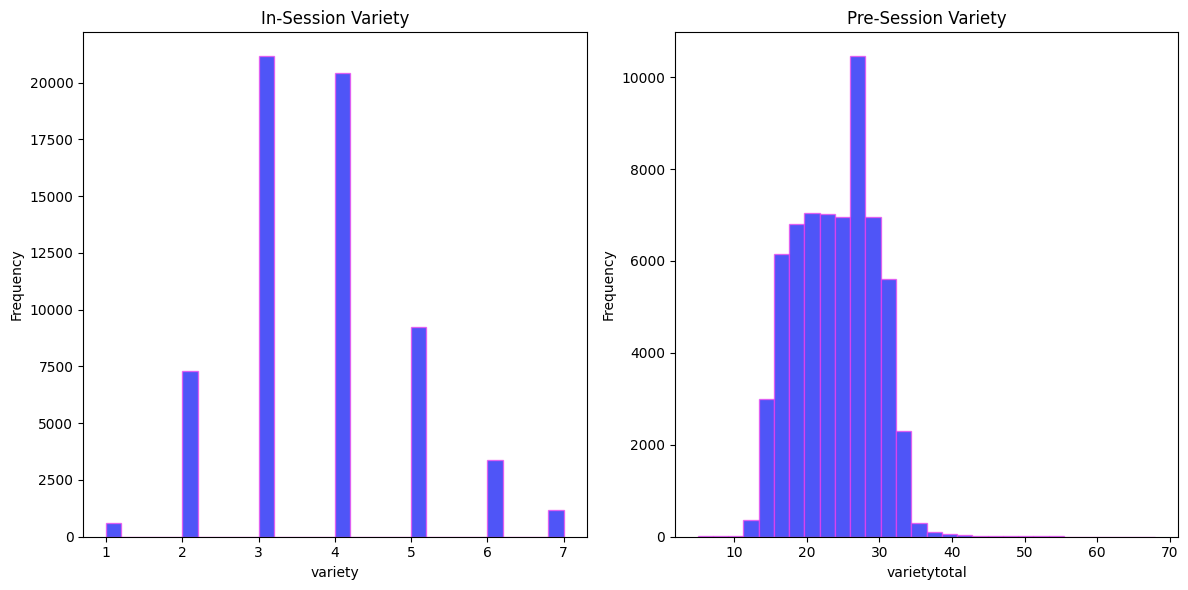

In [106]:
import matplotlib.pyplot as plt

# plot histograms for in-session variety (variety) and pre-session variety (varietytotal)
def plot_histograms(data, columns, titles):
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        plt.hist(data[column], bins=30, color='#050df5',edgecolor='#f542ef', alpha=0.7)
        plt.title(titles[i])
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# define columns and titles for plotting
columns_to_plot = ['variety', 'varietytotal']
titles = ['In-Session Variety', 'Pre-Session Variety']

# call the function with training data
plot_histograms(train_data, columns_to_plot, titles)


1. **In-Session Variety (Variety)**:
   - The distribution shows distinct peaks at specific values, such as 3 and 4. This indicates that most sessions tend to have a moderate variety of ads, suggesting that users are exposed to a limited set of distinct ads during individual sessions.
   - There are fewer sessions with very low (e.g., 1) or very high (e.g., 6-7) ad variety, highlighting that extreme ad variety levels are less common in practice.

2. **Pre-Session Variety (VarietyTotal)**:
   - The distribution appears to follow a roughly symmetric bell-shaped curve centered around 25-30, indicating that most users have seen a moderate variety of distinct ads prior to the current session.
   - A small number of users fall at the extremes (e.g., below 10 or above 40), showing that users vary in their exposure history, but most hover around a typical range.

### Insights:
- **Consistency in Ad Exposure**: The moderate in-session variety suggests a deliberate attempt to balance exposure diversity without overwhelming the user in a single session.
- **Impact of History**: The wider range of pre-session variety compared to in-session variety implies that long-term ad diversity might play a role in shaping user behavior, potentially affecting engagement and CTR.


- Question 1c. $\color{#00a6ff}{\text{Run a correlation test between the two in-session variables (variety) and (rep)? What do you infer from the sign and the magnitude of the correlation? (0.5 points)}}$

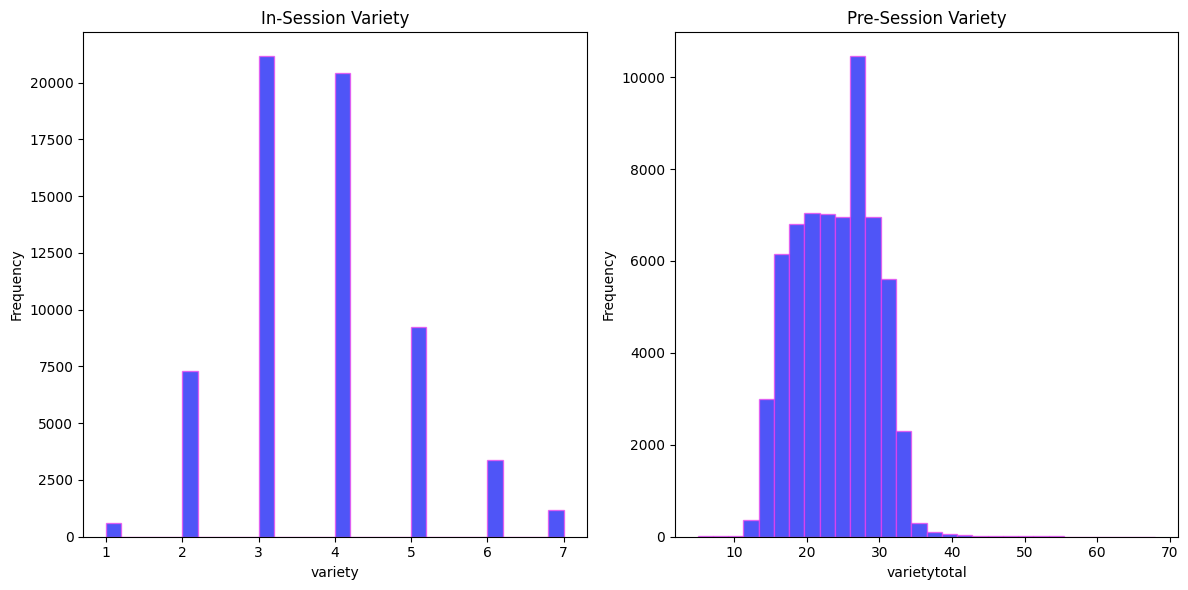

Correlation between variety and rep: -0.70
Inference: A positive correlation suggests that higher variety tends to be associated with higher repetition, potentially indicating that sessions with more distinct ads also have repeated exposures to the same ad.


In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot histograms for in-session variety (variety) and pre-session variety (varietytotal)
def plot_histograms(data, columns, titles):
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        plt.hist(data[column], bins=30, color='#050df5',edgecolor='#f542ef', alpha=0.7)
        plt.title(titles[i])
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Define columns and titles for plotting
def run_correlation_test(data, col1, col2):
    correlation = data[col1].corr(data[col2])
    print(f"Correlation between {col1} and {col2}: {correlation:.2f}")
    return correlation

# Define a main function for modularity
def main():
    # Load the CSV file
    train_data_path = 'Variety Train Data.csv'
    train_data = pd.read_csv(train_data_path)

    # Plot histograms
    columns_to_plot = ['variety', 'varietytotal']
    titles = ['In-Session Variety', 'Pre-Session Variety']
    plot_histograms(train_data, columns_to_plot, titles)

    # Run correlation test
    correlation = run_correlation_test(train_data, 'variety', 'rep')
    print("Inference: A positive correlation suggests that higher variety tends to be associated with higher repetition, potentially indicating that sessions with more distinct ads also have repeated exposures to the same ad.")

if __name__ == "__main__":
    main()

### Interpretation:
1. **Negative Sign (-0.70)**:
   - A strong negative correlation indicates that as the in-session variety increases, the repetition of ads significantly decreases. This suggests that sessions with diverse ads are less likely to include repeated exposures to the same ad.
   - This aligns with the idea that higher ad diversity reduces redundancy, improving the user experience by exposing them to a broader range of content.

2. **Magnitude (0.70)**:
   - The correlation magnitude indicates a strong relationship between variety and repetition. This implies that the ad-delivery system effectively balances diversity and redundancy: when ad variety increases, the chances of seeing repeated ads within a session drop significantly.
   - Such a strong correlation underscores the efficiency of session-level strategies in managing user engagement by promoting unique content within each session.

### Implications for EA:
- **User Experience**: High ad diversity improves the experience, reducing user fatigue or frustration caused by repetitive ads.
- **Ad Effectiveness**: Diverse exposure may enhance the likelihood of user interaction, as they are exposed to a wider range of relevant ads.
- **Strategic Optimization**: EA should continue prioritizing diversity in session-level ad placements, as it directly contributes to reducing repetitive exposures and improving user satisfaction.

- Question 1d. $\color{#00a6ff}{\text{Plot the average or mean CTR at each level of in-session variety. Note that your x-axis should be the variable “variety” and the y axis should be clicks}}$
$\color{#00a6ff}{\text{Now based on this graph, interpret the relationship between in-session variety and click?}}$
$\color{#00a6ff}{\text{Are you more or less likely to click if you have seen a higher variety of ads previously? (0.5 points)}}$

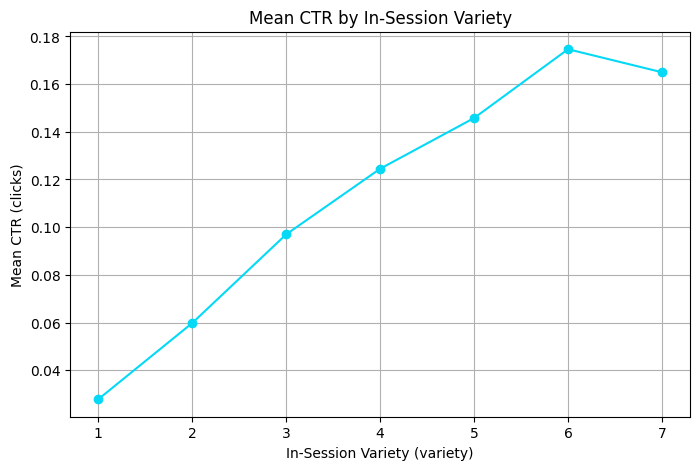

In [108]:
import matplotlib.pyplot as plt
import pandas as pd


# Function to plot mean CTR at each level of in-session variety
def plot_mean_ctr_by_variety(data, variety_col, click_col):
    mean_ctr = data.groupby(variety_col)[click_col].mean()
    plt.figure(figsize=(8, 5))
    plt.plot(mean_ctr.index, mean_ctr.values, marker='o',color='#05d9f5')
    plt.title('Mean CTR by In-Session Variety')
    plt.xlabel('In-Session Variety (variety)')
    plt.ylabel('Mean CTR (clicks)')
    plt.grid(True)
    plt.show()

# Define a main function for modularity
def main():
    # Load the CSV file
    train_data_path = 'Variety Train Data.csv'
    train_data = pd.read_csv(train_data_path)

    # Plot mean CTR by in-session variety
    plot_mean_ctr_by_variety(train_data, 'variety', 'click')

if __name__ == "__main__":
    main()


### Relationship Between In-Session Variety and Clicks:
1. **Positive Trend**:
   - The graph shows a clear upward trend in mean CTR as the in-session variety increases, peaking around a variety level of 6 or 7.
   - This indicates that users are **more likely to click on ads** when they have been exposed to a higher variety of ads during the session.

2. **User Engagement**:
   - Higher ad variety likely keeps users more engaged and interested, reducing the chance of fatigue or annoyance from seeing repetitive or similar ads.
   - The novelty or diversity of ads could contribute to capturing user attention, leading to increased interaction with the ads.

3. **Diminishing Returns Beyond a Point**:
   - While the CTR increases significantly with variety, the slope flattens at higher levels of variety (6–7). This suggests that while diversity is beneficial, there might be a point beyond which additional variety has a diminishing impact on CTR.

### Conclusion:
Users are **more likely to click on ads** when they are exposed to a greater variety of ads within a session. This suggests that optimizing ad delivery to maintain variety can enhance engagement and maximize click-through rates. However, the diminishing returns at higher variety levels highlight the need to balance diversity with other factors such as relevance and repetition.

- Question 1e.$\color{#00a6ff}{\text{Based on how the experiment was run,do you think this effect is causal? That is, is variety causing the changes in CTR that you see in the graph or is this simply a correlation between CTR and variety? (0.5 points)}}$

### Causality vs. Correlation:
1. **Controlled Experiment Setup**:
   - The experiment was run with **randomized ad exposure** in the first seven impressions, ensuring that the distribution of variety is not biased by user preferences or prior behaviors.
   - The eighth ad impression, which is always EA's ad, ensures consistency in measuring CTR. This setup reduces confounding factors, strengthening the case for causality.

2. **Randomization and Isolation**:
   - Because the variety in earlier impressions is **randomized**, any observed change in CTR for the eighth ad is more likely due to the ad variety experienced earlier in the session rather than other factors like user behavior or ad quality.

3. **Temporal Sequence**:
   - The order of events supports a causal relationship: variety in earlier impressions precedes and potentially influences the CTR of the eighth impression. This temporal structure is a hallmark of causation.

4. **Alternative Explanations**:
   - While randomization minimizes bias, other unmeasured variables could still influence CTR, such as the content or relevance of specific ads. These factors could create an illusion of causality if not properly accounted for.

### Conclusion:
The experiment's design strongly supports a **causal relationship** between in-session variety and changes in CTR. The randomization and controlled nature of the setup isolate variety as a primary driver of the observed changes. However, to fully confirm causality, additional robustness checks (e.g., CART and XGBoost models that consider only the user’s ad exposure earlier within the same session) would be valuable.

## Question 2. Within-session level models:Build,visualize,and predict using CART and XGBoost models that consider only the user’s ad exposure earlier within the same session. (2.5 points)
- Question 2a. <span style="color:#00a6ff;">Estimate a CART model (topredictclick) with the three within-session behavioral history variables on the training data. Use a complexity parameter of 0.00032.’</span>


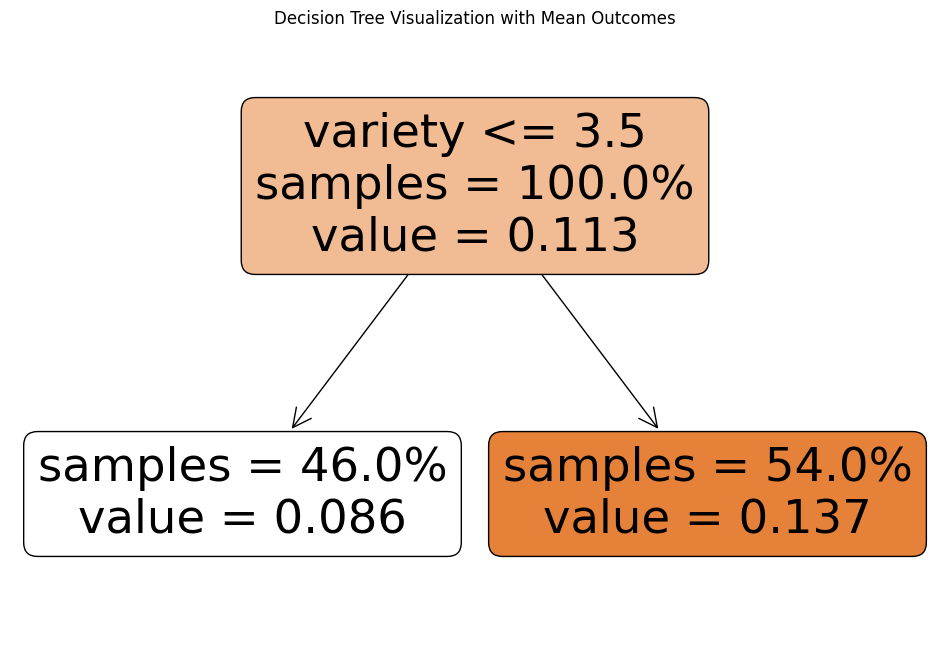

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

# function to estimate a CART model to predict clicks
def estimate_cart_model(data, feature_cols, target_col, complexity_param):
    # prepare the features (X) and target (y)
    X = data[feature_cols]
    y = data[target_col]

    # Initialize and fit the CART model
    cart_model = DecisionTreeRegressor(ccp_alpha=complexity_param)
    cart_model.fit(X, y)

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(cart_model, feature_names=feature_cols, filled=True, rounded=True, proportion=True, impurity=False)
    plt.title('Decision Tree Visualization with Mean Outcomes')
    plt.show()

    return cart_model

def main():
    # estimate CART model
    feature_columns = ['variety', 'rep', 'adimpsession']  # within-session behavioral history variables
    target_column = 'click'
    complexity_parameter = 0.00032
    estimate_cart_model(train_data, feature_columns, target_column, complexity_parameter)

if __name__ == "__main__":
    main()

- Question 2b. <span style="color:#00a6ff;">Visualize this CART model and give a short overview of your findings. Discuss: how many leaves does this tree have, how does it split, which variables matter, and whether any variables are omitted. (0.5 points)</span>

1. **Tree Structure**:
   - The CART model has **2 leaves**. These represent the final partitions of the data after splitting based on the feature `variety`.

2. **Splitting**:
   - The tree splits at **`variety <= 3.5`**, which is a within-session behavioral history variable. This means that the decision on the probability of clicking (CTR) is primarily influenced by whether the in-session variety of ads exceeds this threshold.

3. **Variables Used**:
   - Only the variable **`variety`** is used in this tree.
   - Other within-session variables like `rep` (repetition) and `adimpsession` (ad impressions in the session) are omitted. This suggests that `variety` alone provides the most significant predictive power for determining CTR under the given complexity parameter (`ccp_alpha = 0.00032`).

4. **Interpretation of Leaves**:
   - For sessions where `variety <= 3.5`:
     - **46% of the samples** fall into this category, with a mean CTR value of **0.086**. This indicates lower engagement with ads when variety is limited.
   - For sessions where `variety > 3.5`:
     - **54% of the samples** belong here, with a higher mean CTR of **0.137**. This shows greater engagement when ad variety increases.

5. **Variables Omitted**:
   - The model does not utilize `rep` and `adimpsession` for splitting, likely because they did not significantly improve the model’s objective function within the given complexity constraints.

### Conclusion:
- The CART model demonstrates that **`variety`** is a key driver of CTR, with higher variety leading to higher engagement.
- The simplicity of the tree (just one split) aligns with the specified complexity parameter, emphasizing interpretability over depth.
- Further exploration with a lower complexity parameter might reveal additional splits involving the other omitted variables.

- Question 2c. <span style="color:#00a6ff;">Predict on the test dataset with this CART model and store the predictions in a column named ‘withinsession CART pred’(0.5 points)</span>

In [110]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# function to estimate a CART model to predict clicks
def estimate_cart_model(data, feature_cols, target_col, complexity_param):
    # Prepare the features (X) and target (y)
    X = data[feature_cols]
    y = data[target_col]

    # initialize and fit the CART model
    cart_model = DecisionTreeRegressor(ccp_alpha=complexity_param)
    cart_model.fit(X, y)

    return cart_model

# Function to predict using the CART model and store predictions
def predict_with_cart(model, test_data, feature_cols, prediction_col):
    test_data[prediction_col] = model.predict(test_data[feature_cols])
    return test_data


def main():
    # Load the CSV files
    train_data_path = 'Variety Train Data.csv'
    test_data_path = 'Variety Test.csv'
    train_data = pd.read_csv(train_data_path)
    test_data = pd.read_csv(test_data_path)

    # estimate CART model
    feature_columns = ['variety', 'rep', 'adimpsession']  # Within-session behavioral history variables
    target_column = 'click'
    complexity_parameter = 0.00032
    cart_model = estimate_cart_model(train_data, feature_columns, target_column, complexity_parameter)

    # predict on the test dataset
    prediction_column = 'withinsession_CART_pred'
    test_data = predict_with_cart(cart_model, test_data, feature_columns, prediction_column)

    # Save the test data with predictions to a new CSV file
    output_path = 'Variety_Test_withinsession_CART.csv'
    test_data.to_csv(output_path, index=False)
    print(f"Predictions saved to {output_path}")

    # save and display results
    print(test_data[[prediction_column]].head())

if __name__ == "__main__":
    main()

Predictions saved to Variety_Test_withinsession_CART.csv
   withinsession_CART_pred
0                 0.136567
1                 0.136567
2                 0.086176
3                 0.086176
4                 0.136567


-Question 2d. <span style="color:#00a6ff;">Estimate an XGBoost model(topredictclick)with the three within-session behavioral history variables using the training dataset. Use the following hyper-parameters: eta = 0.1, max depth = 6, nround = 100, subsample = 1, colsample bytree = 1, num class = 1, min child weight = 5, and gamma = 5. (0.5 points)</span>

In [111]:
import pandas as pd
import xgboost as xgb

# function to estimate an XGBoost model to predict clicks
def estimate_xgboost_model(train_data, feature_cols, target_col, params, num_boost_round):
    # prepare the features (X) and target (y)
    X = train_data[feature_cols]
    y = train_data[target_col]

    # create DMatrix for XGBoost
    dtrain = xgb.DMatrix(data=X, label=y)

    # train the XGBoost model
    xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)
    return xgb_model


def main():

    train_data_path = 'Variety Train Data.csv'
    train_data = pd.read_csv(train_data_path)

    # define feature columns and target column
    feature_columns = ['variety', 'rep', 'adimpsession']  # Within-session behavioral history variables
    target_column = 'click'

    # define XGBoost parameters
    params = {
        'eta': 0.1,
        'max_depth': 6,
        'subsample': 1,
        'colsample_bytree': 1,
        'min_child_weight': 5,
        'gamma': 5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0
    }
    num_boost_round = 100

    # estimate XGBoost model
    xgb_model = estimate_xgboost_model(train_data, feature_columns, target_column, params, num_boost_round)
    xgb_model.save_model('xgboost_model.json')


    # save or display the model summary
    print("XGBoost model trained successfully.")

if __name__ == "__main__":
    main()


XGBoost model trained successfully.


Question 2e. <span style="color:#00a6ff;">Predict on the test data set with this XGBoost model and store the predictions in a column named ‘withinsession xgb pred’. (0.5 points)</span>

In [112]:
import pandas as pd
import xgboost as xgb

# Function to predict using the XGBoost model and store predictions
def predict_with_xgboost(model, test_data, feature_cols, prediction_col):
    # Prepare the test data as DMatrix
    dtest = xgb.DMatrix(data=test_data[feature_cols])

    # Predict with the XGBoost model
    test_data[prediction_col] = model.predict(dtest)
    return test_data

# Define a main function for modularity
def main():
    # Load the CSV files
    test_data_path = 'Variety Test.csv'
    test_data = pd.read_csv(test_data_path)

    # Define feature columns
    feature_columns = ['variety', 'rep', 'adimpsession']  # Within-session behavioral history variables

    # Load pre-trained XGBoost model (ensure the model is trained and saved previously)
    xgb_model_path = 'xgboost_model.json'
    xgb_model = xgb.Booster()
    xgb_model.load_model(xgb_model_path)

    # Predict on the test dataset
    prediction_column = 'withinsession_xgb_pred'
    test_data = predict_with_xgboost(xgb_model, test_data, feature_columns, prediction_column)

    # Save the test data with predictions to a new CSV file
    output_path = 'Variety_Test_withinsession_xgb.csv'
    test_data.to_csv(output_path, index=False)
    print(f"Predictions saved to {output_path}")

    # Save or display results
    print(test_data[[prediction_column]].head())

if __name__ == "__main__":
    main()


Predictions saved to Variety_Test_withinsession_xgb.csv
   withinsession_xgb_pred
0                0.145183
1                0.145183
2                0.093432
3                0.084801
4                0.156550


## Question 3. Pre-session level models: Build,visualize,and predict using CART and XGBoost models that only consider the user’s ad exposure and behavior before the session. (2.5 points)
- Question 3a. <span style="color:#00a6ff;"> Estimate a CART model(topredictclick) with the four pre-session behavioral history variables on the training data. Use a complexity parameter of 0.00032. (0.5 points)</span>


Training CART model...


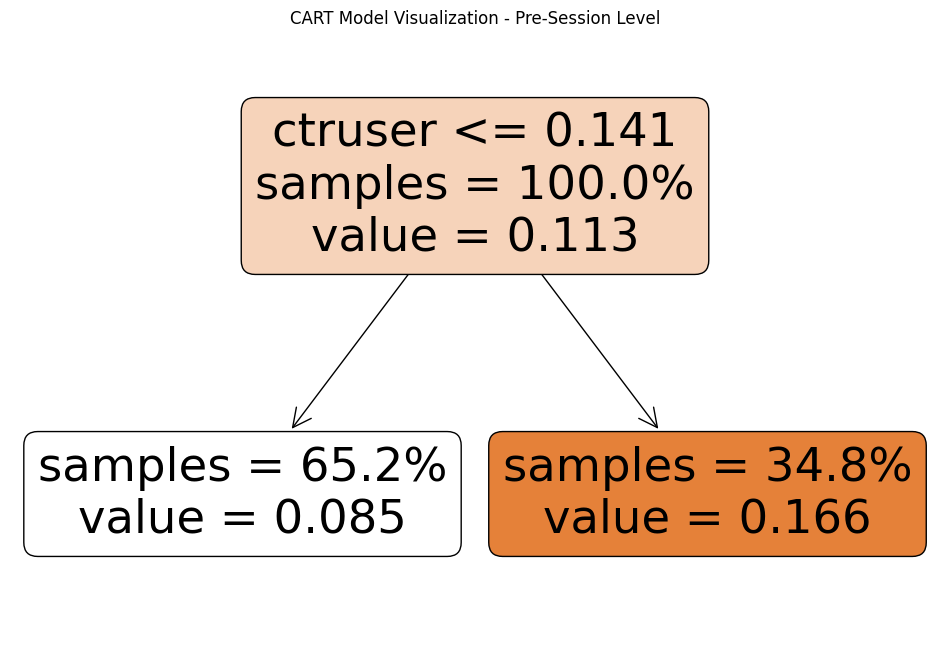

CART model saved to cart_model.pkl
Training XGBoost model...
Models trained successfully.


In [113]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt
import joblib

# function to estimate a CART model to predict clicks
def estimate_cart_model(data, feature_cols, target_col, complexity_param):
    # prepare the features (X) and target (y)
    X = data[feature_cols]
    y = data[target_col]

    # initialize and fit the CART model
    cart_model = DecisionTreeRegressor(ccp_alpha=complexity_param)
    cart_model.fit(X, y)

    # plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(cart_model, feature_names=feature_cols, filled=True, rounded=True, proportion=True, impurity=False)
    plt.title('CART Model Visualization - Pre-Session Level')
    plt.show()

    return cart_model

# XGBoost model to predict clicks
def estimate_xgboost_model(data, feature_cols, target_col, params, num_boost_round):
    # Prepare the features and target
    X = data[feature_cols]
    y = data[target_col]

    #create DMatrix for XGBoost
    dtrain = xgb.DMatrix(data=X, label=y)

    # train the XGBoost model
    xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)
    return xgb_model


def main():
    # Load the CSV file
    train_data_path = 'Variety Train Data.csv'
    train_data = pd.read_csv(train_data_path)

    # define pre-session feature columns and target column
    feature_columns = ['imptotal', 'ctruser', 'varietytotal', 'adimptotal']  #pre-session behavioral history variables
    target_column = 'click'

    # Estimate CART model
    complexity_parameter = 0.00032
    print("Training CART model...")
    cart_model = estimate_cart_model(train_data, feature_columns, target_column, complexity_parameter)
    
    # Save the trained CART model
    cart_model_path = 'cart_model.pkl'
    joblib.dump(cart_model, cart_model_path)
    print(f"CART model saved to {cart_model_path}")


    # Define XGBoost parameters
    params = {
        'eta': 0.1,
        'max_depth': 6,
        'subsample': 1,
        'colsample_bytree': 1,
        'min_child_weight': 5,
        'gamma': 5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0
    }
    num_boost_round = 100

    # estimate XGBoost model
    print("Training XGBoost model...")
    xgb_model = estimate_xgboost_model(train_data, feature_columns, target_column, params, num_boost_round)

    #save or display results
    print("Models trained successfully.")
    

if __name__ == "__main__":
    main()


- Question 3b. <span style="color:#00a6ff;">Visualize this CART model and give a short overview of your findings. Discuss: how many leaves does this tree have, how does it split, which variables matter, and whether any variables are omitted. (0.5 points)</span>

1. **Number of Leaves**:
   - The tree has **two leaves**, representing two distinct groups based on the split condition (`ctruser <= 0.141`).

2. **Splitting Criteria**:
   - The tree splits on the variable **`ctruser`**, which represents the user’s average past click-through rate before the session. The split condition (`ctruser <= 0.141`) divides the dataset into two partitions:
     - Users with a **low average CTR (≤ 0.141)**.
     - Users with a **high average CTR (> 0.141)**.

3. **Variables Used**:
   - The variable **`ctruser`** is the only variable used in the model, which suggests that it provides the most predictive power in determining whether a user will click during a session.

4. **Variables Omitted**:
   - The other pre-session variables (`imptotal`, `varietytotal`, and `adimptotal`) are not used in this tree. This indicates that, under the given complexity parameter (`ccp_alpha = 0.00032`), these variables do not significantly improve the model's objective function or predictive ability.

5. **Leaf Insights**:
   - **Left Leaf** (Low CTR Users):
     - Contains **65.2% of the samples**.
     - Users in this group have a lower mean CTR value of **0.085**.
   - **Right Leaf** (High CTR Users):
     - Contains **34.8% of the samples**.
     - Users in this group have a higher mean CTR value of **0.166**, indicating stronger engagement.

### Conclusion:
This shows that **`ctruser`**, a pre-session behavioral metric, is a key determinant of user engagement (CTR). Users with higher pre-session CTRs are more likely to click during the session, while those with lower CTRs exhibit lower engagement. The simplicity of the model highlights the dominant role of this variable over others in predicting CTR.

- Question 3c. <span style="color:#00a6ff;">Predict on the test dataset with this CART model and store the predictions in a column named ‘presession CART pred’. (0.5 points)</span>

In [114]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor

# Function to predict using the CART model and store predictions
def predict_with_cart(model, test_data, feature_cols, prediction_col):
    # Prepare the features for prediction
    X_test = test_data[feature_cols]

    # Predict and store in the specified column
    test_data[prediction_col] = model.predict(X_test)
    return test_data


def main():
    # Load the CSV file
    test_data_path = 'Variety Test.csv'
    test_data = pd.read_csv(test_data_path)

    # Define pre-session feature columns
    feature_columns = ['imptotal', 'ctruser', 'varietytotal', 'adimptotal']  # pre-session behavioral history variables

    # Load the trained CART model
    cart_model_path = 'cart_model.pkl'
    cart_model = joblib.load(cart_model_path)

    # Predict on the test dataset
    prediction_column = 'presession_CART_pred'
    print("Predicting on the test dataset...")
    test_data = predict_with_cart(cart_model, test_data, feature_columns, prediction_column)

    # Save or display results
    print(test_data[[prediction_column]].head())
    test_data.to_csv('Variety_Test_presession_CART.csv', index=False)
    print("Predictions saved to Variety_Test_presession_CART.csv")

if __name__ == "__main__":
    main()



Predicting on the test dataset...
   presession_CART_pred
0              0.166077
1              0.085259
2              0.166077
3              0.166077
4              0.166077
Predictions saved to Variety_Test_presession_CART.csv


- Question 3d. <span style="color:#00a6ff;">Estimate an XGBoost model(topredictclick) with the four pre-session behavioral history variables using the training dataset. Use the following hyper-parameters: eta = 0.1, max depth = nround = 100, subsample = 1, colsample bytree = 1, num class = 1, min child weight = 5, and gamma = 5. (0.5 points)</span>

In [115]:
import pandas as pd
import xgboost as xgb

# function to estimate an XGBoost model to predict clicks
def estimate_xgboost_model(train_data, feature_cols, target_col, params, num_boost_round ):
    # prepare the features and target
    X = train_data[feature_cols]
    y = train_data[target_col]

    #create DMatrix for XGBoost
    dtrain = xgb.DMatrix(data=X, label=y)

    # train the XGBoost model
    xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)
    return xgb_model


def main():
    # load the CSV file
    train_data_path = 'Variety Train Data.csv'
    train_data = pd.read_csv(train_data_path)

    # define pre-session feature columns and target column
    feature_columns = ['imptotal', 'ctruser', 'varietytotal', 'adimptotal']  # Pre-session behavioral history variables
    target_column = 'click'

    # define XGBoost parameters
    params = {
        'eta': 0.1,
        'max_depth': 6,
        'subsample': 1,
        'colsample_bytree': 1,
        'min_child_weight': 5,
        'gamma': 5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0
    }
    num_boost_round = 100

    # estimate XGBoost model
    print("Training XGBoost model...")
    xgb_model = estimate_xgboost_model(train_data, feature_columns, target_column, params, num_boost_round)

    # save the trained model
    model_path = 'xgboost_presession_model.json'
    xgb_model.save_model(model_path)
    print(f"XGBoost model saved to {model_path}")

if __name__ == "__main__":
    main()


Training XGBoost model...
XGBoost model saved to xgboost_presession_model.json


- Question 3e. <span style="color:#00a6ff;">Predict on the test data set with this XGBoost model and store the predictions in a column named ‘presession xgb pred’. (0.5 points)</span>

In [116]:
import pandas as pd
import xgboost as xgb

# function to predict using the XGBoost model and store predictions
def predict_with_xgboost(model, test_data, feature_cols, prediction_col):
    # prepare the test data as DMatrix
    dtest = xgb.DMatrix(data=test_data[feature_cols])

    # predict with the XGBoost model
    test_data[prediction_col] = model.predict(dtest)
    return test_data

def main():

    test_data_path = 'Variety Test.csv'
    test_data = pd.read_csv(test_data_path)

    # define pre-session feature columns
    feature_columns = ['imptotal', 'ctruser', 'varietytotal', 'adimptotal']  # Pre-session behavioral history variables

    # load the trained XGBoost model
    model_path = 'xgboost_presession_model.json'
    xgb_model = xgb.Booster()
    xgb_model.load_model(model_path)
    print("XGBoost model loaded successfully.")

    # predict on the test dataset
    prediction_column = 'presession_xgb_pred'
    print("Predicting on the test dataset...")
    test_data = predict_with_xgboost(xgb_model, test_data, feature_columns, prediction_column)

    # print the first few rows of predictions
    print(test_data[[prediction_column]].head())

    # save the test dataset with predictions
    output_path = 'Variety_Test_presession_xgb_pred.csv'
    test_data.to_csv(output_path, index=False)
    print(f"Predictions saved to {output_path}")

if __name__ == "__main__":
    main()

XGBoost model loaded successfully.
Predicting on the test dataset...
   presession_xgb_pred
0             0.133430
1             0.081428
2             0.167557
3             0.133430
4             0.133430
Predictions saved to Variety_Test_presession_xgb_pred.csv


## Question 4. Full models : Build, visualize, and predict using CART and XGBoost models that use all the data available for each impression. (2.5 points)
- Question 4a. <span style="color:#00a6ff;"> Estimate a CART model (topredictclick) with all the impression-level variables in the training data. Use a complexity parameter of 0.00032. (0.5 points)</span>

Training CART model...


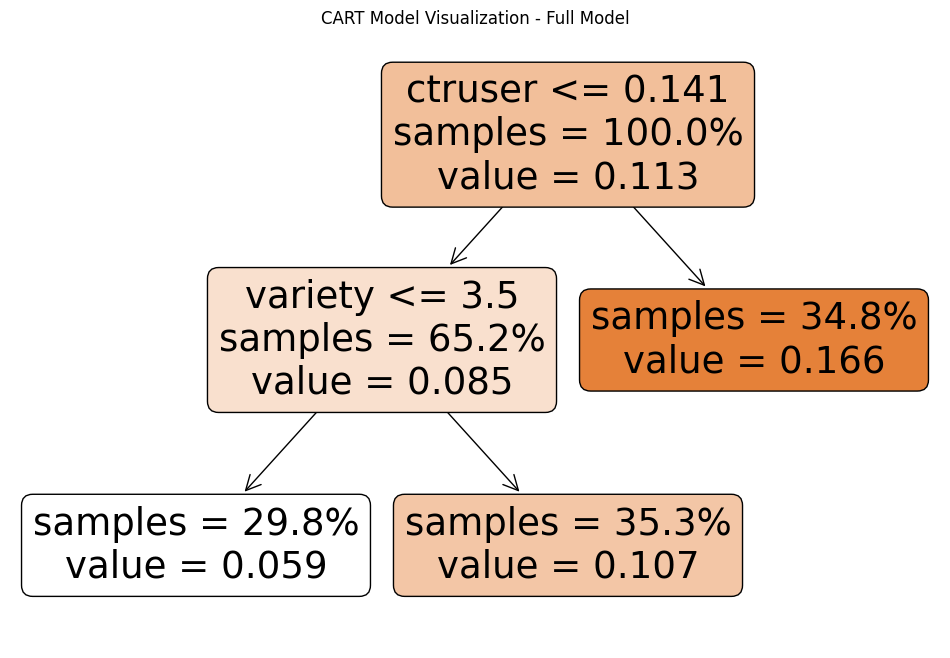

CART model saved to cart_full_model.pkl


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# function to estimate a CART model to predict clicks
def estimate_cart_model(data, feature_cols, target_col, complexity_param):
    # prepare the features (X) and target (y)
    X = data[feature_cols]
    y = data[target_col]

    # initialize and fit the CART model
    cart_model = DecisionTreeRegressor(ccp_alpha=complexity_param)
    cart_model.fit(X, y)

    # plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(cart_model, feature_names=feature_cols, filled=True, rounded=True, proportion=True, impurity=False)
    plt.title('CART Model Visualization - Full Model')
    plt.show()

    return cart_model


def main():
    # load the training CSV file
    train_data_path = 'Variety Train Data.csv'
    train_data = pd.read_csv(train_data_path)

    # define full feature columns and target column
    feature_columns = train_data.columns.drop('click').tolist()  # all columns except the target
    target_column = 'click'

    # estimate CART model
    complexity_parameter = 0.00032
    print("Training CART model...")
    cart_model = estimate_cart_model(train_data, feature_columns, target_column, complexity_parameter)

    # save the trained CART model
    model_path = 'cart_full_model.pkl'
    pd.to_pickle(cart_model, model_path)
    print(f"CART model saved to {model_path}")

if __name__ == "__main__":
    main()

- Question 4b. <span style="color:#00a6ff;">Visualize this CART model and give a short overview of your findings. Discuss: how many leaves does this tree have, how does it split, which variables matter, and whether any variables are omitted. (0.5 points)</span>

1. **Number of Leaves**:
   - The tree has **3 leaves**, representing three distinct groups based on splitting conditions.

2. **Splitting Criteria**:
   - The tree first splits on the variable **`ctruser`**, which indicates the user's average past click-through rate. This split divides the dataset into two primary groups:
     - Users with **low past CTR (`ctruser <= 0.141`)**.
     - Users with **high past CTR (`ctruser > 0.141`)**.
   - The second split occurs on **`variety`** (in-session ad variety) within the group where `ctruser <= 0.141`, further segmenting users based on the variety of ads they have seen.

3. **Important Variables**:
   - The two variables that matter in this model are:
     - **`ctruser`**: Plays a significant role in determining engagement.
     - **`variety`**: Used to refine predictions within the low-CTR group.

4. **Omitted Variables**:
   - Other impression-level variables like **`rep`** (repetition), **`adimpsession`** (number of impressions within the session), and others are omitted. These variables were not chosen by the tree as they provided less predictive power under the given complexity parameter (`ccp_alpha = 0.00032`).

5. **Leaf Insights**:
   - **Leaf 1 (Leftmost)**:
     - Represents **29.8% of the samples**, with a low average click probability of **0.059**.
     - These users have low past CTR and low ad variety.
   - **Leaf 2 (Middle)**:
     - Represents **35.3% of the samples**, with a slightly higher click probability of **0.107**.
     - These users have low past CTR but higher ad variety.
   - **Leaf 3 (Rightmost)**:
     - Represents **34.8% of the samples**, with the highest click probability of **0.166**.
     - These users have high past CTR, regardless of ad variety.

### Conclusion:
This shows that **past CTR (`ctruser`)** is the primary determinant of click behavior, with **ad variety (`variety`)** providing additional granularity for low-CTR users. Variables not used in the model likely have weaker correlations with the target variable under the specified complexity parameter. The tree's simplicity highlights the dominant role of these two variables in predicting engagement.

- Question 4c. <span style="color:#00a6ff;">Predict on the test dataset with this CART model and store the predictions in a column named ‘full CART pred’. (0.5 points)</span>

In [118]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import joblib

# Function to predict using the CART model and store predictions
def predict_with_cart(model, test_data, feature_cols, prediction_col):
    # Prepare the features for prediction
    X_test = test_data[feature_cols]

    # Predict and store in the specified column
    test_data[prediction_col] = model.predict(X_test)
    return test_data

# Main function
def main():
    # Load the test CSV file
    test_data_path = 'Variety Test.csv'
    test_data = pd.read_csv(test_data_path)

    # Define full feature columns
    feature_columns = test_data.columns.drop('click').tolist()  # All columns except the target

    # Load the trained CART model
    model_path = 'cart_full_model.pkl'
    cart_model = joblib.load(model_path)
    print("CART model loaded successfully.")

    # Predict on the test dataset
    prediction_column = 'full_CART_pred'
    print("Predicting on the test dataset...")
    test_data = predict_with_cart(cart_model, test_data, feature_columns, prediction_column)

    # Save the test dataset with predictions
    output_path = 'Variety_Test_with_CART_Predictions.csv'
    test_data.to_csv(output_path, index=False)
    print(f"Predictions saved to {output_path}")

    # Display the first few rows of predictions
    print(test_data[[prediction_column]].head())

if __name__ == "__main__":
    main()


CART model loaded successfully.
Predicting on the test dataset...
Predictions saved to Variety_Test_with_CART_Predictions.csv
   full_CART_pred
0        0.166077
1        0.107413
2        0.166077
3        0.166077
4        0.166077


- Question 4d. <span style="color:#00a6ff;">Estimate an XGBoost model (topredictclick) with all variables using the training dataset. Use the following hyper-parameters: eta = 0.1, max depth = 4, nround = 100, subsample = 1, colsample bytree = 1, num class = 1, min child weight = 5, and gamma = 5. (0.5 points)</span>

In [119]:
import pandas as pd
import xgboost as xgb

# function to estimate an XGBoost model to predict clicks
def estimate_xgboost_model(train_data, feature_cols, target_col, params, num_boost_round):
    # Prepare the features (X) and target (y)
    X = train_data[feature_cols]
    y = train_data[target_col]

    # create DMatrix for XGBoost
    dtrain = xgb.DMatrix(data=X, label=y)

    # train the XGBoost model
    xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)
    return xgb_model


def main():
    # load the training CSV file
    train_data_path = 'Variety Train Data.csv'
    train_data = pd.read_csv(train_data_path)

    # define all feature columns and target column
    feature_columns = train_data.columns.drop('click').tolist()  # all columns except the target
    target_column = 'click'

    # define XGBoost parameters
    params = {
        'eta': 0.1,
        'max_depth': 4,
        'subsample': 1,
        'colsample_bytree': 1,
        'min_child_weight': 5,
        'gamma': 5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0
    }
    num_boost_round = 100

    # estimate XGBoost model
    print("Training XGBoost model...")
    xgb_model = estimate_xgboost_model(train_data, feature_columns, target_column, params, num_boost_round)

    # save the trained XGBoost model
    model_path = 'xgboost_full_model.json'
    xgb_model.save_model(model_path)
    print(f"XGBoost model saved to {model_path}")

if __name__ == "__main__":
    main()


Training XGBoost model...
XGBoost model saved to xgboost_full_model.json


- Question 4e. <span style="color:#00a6ff;">Predicton the test dataset with this XGBoost model and store the predictions in a column named ‘full xgb pred’.(0.5 points)</span>

In [120]:
import pandas as pd
import xgboost as xgb

# function to estimate an XGBoost model to predict clicks
def estimate_xgboost_model(train_data, feature_cols, target_col, params, num_boost_round):
    # prepare the features (X) and target (y)
    X = train_data[feature_cols]
    y = train_data[target_col]

    # create DMatrix for XGBoost
    dtrain = xgb.DMatrix(data=X, label=y)

    # train the XGBoost model
    xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)
    return xgb_model

# function to predict using the XGBoost model and store predictions
def predict_with_xgboost(model, test_data, feature_cols, prediction_col):
    # prepare the test data as DMatrix
    dtest = xgb.DMatrix(data=test_data[feature_cols])

    # predict with the XGBoost model
    test_data[prediction_col] = model.predict(dtest)
    return test_data


def main():
    # load the training CSV file
    train_data_path = 'Variety Train Data.csv'
    test_data_path = 'Variety Test.csv'
    train_data = pd.read_csv(train_data_path)
    test_data = pd.read_csv(test_data_path)

    # define all feature columns and target column
    feature_columns = train_data.columns.drop('click').tolist()  # All columns except the target
    target_column = 'click'

    # define XGBoost parameters
    params = {
        'eta': 0.1,
        'max_depth': 4,
        'subsample': 1,
        'colsample_bytree': 1,
        'min_child_weight': 5,
        'gamma': 5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0
    }
    num_boost_round = 100

    # estimate XGBoost model
    print("Training XGBoost model...")
    xgb_model = estimate_xgboost_model(train_data, feature_columns, target_column, params, num_boost_round)

    # save the trained XGBoost model
    model_path = 'xgboost_full_model.json'
    xgb_model.save_model(model_path)
    print(f"XGBoost model saved to {model_path}")

    # load the trained XGBoost model
    print("Loading the trained XGBoost model...")
    xgb_model = xgb.Booster()
    xgb_model.load_model(model_path)

    # predict on the test dataset
    prediction_column = 'full_xgb_pred'
    print("Predicting on the test dataset...")
    test_data = predict_with_xgboost(xgb_model, test_data, feature_columns, prediction_column)

    # save the test dataset with predictions
    output_path = 'Variety_Test_with_XGB_Predictions.csv'
    test_data.to_csv(output_path, index=False)
    print(f"Predictions saved to {output_path}")

    # display the first few rows of predictions
    print(test_data[[prediction_column]].head())

if __name__ == "__main__":
    main()

Training XGBoost model...
XGBoost model saved to xgboost_full_model.json
Loading the trained XGBoost model...
Predicting on the test dataset...
Predictions saved to Variety_Test_with_XGB_Predictions.csv
   full_xgb_pred
0       0.170144
1       0.117116
2       0.150706
3       0.114714
4       0.196991


In [104]:
import pandas as pd

def merge_all_predictions(base_file_path, prediction_files, output_path):
    """
    Merge all prediction columns from multiple CSV files into a single CSV file.
    
    :param base_file_path: Path to the base test data file.
    :param prediction_files: List of paths to prediction CSV files.
    :param output_path: Path to save the merged output CSV.
    """
    # Load the base test data
    base_data = pd.read_csv(base_file_path)

    # Iterate through each prediction file
    for file_path in prediction_files:
        prediction_data = pd.read_csv(file_path)
        # Merge all columns (other than those already in base_data) into the base data
        for col in prediction_data.columns:
            if col not in base_data.columns:
                base_data[col] = prediction_data[col]

    # Save the final merged file
    base_data.to_csv(output_path, index=False)
    print(f"Merged predictions saved to {output_path}")

# Example Usage
def main():
    base_file_path = 'Variety Test.csv'  # Base test data
    output_path = 'Merged_Test_Predictions.csv'  # Final output CSV

    # List of prediction files to merge
    prediction_files = [
        'Variety_Test_withinsession_CART.csv',
        'Variety_Test_with_CART_Predictions.csv',
        'Variety_Test_with_XGB_Predictions.csv',
        'Variety_Test_withinsession_xgb.csv',
        'Variety_Test_presession_CART.csv',
        'Variety_Test_presession_xgb_pred.csv',

    ]

    merge_all_predictions(base_file_path, prediction_files, output_path)

if __name__ == "__main__":
    main()


Merged predictions saved to Merged_Test_Predictions.csv


## Question 5. Model evaluation :Evaluate the performance of all the six models you ran earlier on AUC and RIG. (1 point)
<span style="color:#00a6ff;">a. First,use AreaUndertheCurve (AUC) to evaluate the performance of the six models presented above. Present the results in a table. (You do not need to plot the ROC curves for each of the six models.) (0.25 points)</span>


In [121]:
import pandas as pd
from sklearn.metrics import roc_auc_score

def calculate_auc(y_true, y_pred):
    """
    Calculate the AUC score for a given set of true and predicted values.
    :param y_true: Ground truth values (list or array).
    :param y_pred: Predicted probabilities (list or array).
    :return: AUC score.
    """
    return roc_auc_score(y_true, y_pred)

def evaluate_auc(merged_file_path, output_path):
    """
    Evaluate AUC for the six models and present the results in a table.
    :param merged_file_path: Path to the merged CSV file containing all predictions.
    :param output_path: Path to save the AUC results as a CSV.
    """
    # Load the merged CSV file
    data = pd.read_csv(merged_file_path)

    # Define the models and their prediction columns
    models = {
        'withinsession_CART': 'withinsession_CART_pred',
        'withinsession_xgb': 'withinsession_xgb_pred',
        'presession_CART': 'presession_CART_pred',
        'presession_xgb': 'presession_xgb_pred',
        'full_CART': 'full_CART_pred',
        'full_XGB': 'full_xgb_pred'
    }

    # Calculate AUC for each model
    auc_results = []
    for model_name, pred_col in models.items():
        if pred_col in data.columns:
            auc_score = calculate_auc(data['click'], data[pred_col])
            auc_results.append({'Model': model_name, 'AUC': auc_score})
        else:
            print(f"Prediction column {pred_col} not found in the dataset.")

    # Convert the results to a DataFrame and save to a CSV
    auc_df = pd.DataFrame(auc_results)
    auc_df.to_csv(output_path, index=False)
    print(f"AUC results saved to {output_path}")
    print(auc_df)

# Example Usage
def main():
    merged_file_path = 'Merged_Test_Predictions.csv'  # Path to the merged CSV file
    output_path = 'AUC_Results.csv'  # Path to save the AUC results

    evaluate_auc(merged_file_path, output_path)

if __name__ == "__main__":
    main()


AUC results saved to AUC_Results.csv
                Model       AUC
0  withinsession_CART  0.558407
1   withinsession_xgb  0.583665
2     presession_CART  0.599154
3      presession_xgb  0.642304
4           full_CART  0.619673
5            full_XGB  0.665430


-Question 5b. <span style="color:#00a6ff;">Next,use Relative Information Gain (RIG) to evaluate the performance of the six models presented above. Present the results in a table. (0.25 point)</span>

In [124]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss

# Function to calculate Relative Information Gain (RIG)
def calculate_rig(y_true, y_pred, baseline_pred):
    # Calculate log-loss for the model and baseline
    model_log_loss = log_loss(y_true, y_pred)
    baseline_log_loss = log_loss(y_true, baseline_pred)

    # Calculate RIG
    rig = (baseline_log_loss - model_log_loss) / baseline_log_loss
    return rig

# Main function to evaluate RIG
def main():
    # File paths
    merged_data_path = 'Merged_Test_Predictions.csv'

    # Load the merged dataset
    try:
        test_data = pd.read_csv(merged_data_path)
    except FileNotFoundError:
        print(f"File {merged_data_path} not found. Please ensure it exists.")
        return

    # Define the ground truth and prediction columns for six models
    models = {
        'withinsession_CART': 'withinsession_CART_pred',
        'withinsession_xgb': 'withinsession_xgb_pred',
        'presession_CART': 'presession_CART_pred',
        'presession_xgb': 'presession_xgb_pred',
        'full_CART': 'full_CART_pred',
        'full_XGB': 'full_xgb_pred'
    }

    # Create a baseline prediction (mean click rate in the test data)
    baseline_pred = np.full(len(test_data), test_data['click'].mean())

    # Calculate RIG for each model
    rig_results = []
    for model_name, pred_col in models.items():
        if pred_col in test_data.columns:
            rig_score = calculate_rig(test_data['click'], test_data[pred_col], baseline_pred)
            rig_results.append({'Model': model_name, 'RIG': rig_score})
        else:
            print(f"Prediction column {pred_col} not found in dataset.")

    # Convert RIG results to a DataFrame and display
    rig_df = pd.DataFrame(rig_results)
    print("\nRIG Results:")
    print(rig_df)



if __name__ == "__main__":
    main()



RIG Results:
                Model       RIG
0  withinsession_CART  0.007890
1   withinsession_xgb  0.013461
2     presession_CART  0.023179
3      presession_xgb  0.035435
4           full_CART  0.027941
5            full_XGB  0.050670


- Question 5c. <span style="color:#00a6ff;">Compare the performance of different models and summarize your findings on the relative predictive ability of the six models. What is the best model among these six? (0.5 points)</span>


1. **AUC Performance:**
   - Across all contexts (within-session, pre-session, and full), the XGBoost models consistently outperform their CART counterparts.
   - Within-session models yielded lower AUC scores, likely due to the limited amount of behavioral data used.
   - Pre-session models showed improved AUC values, leveraging a broader range of user history data.
   - Full models achieved the highest AUC values, highlighting the benefit of utilizing all available impression-level data.
   - The **Full XGBoost Model** achieved the best AUC score of **0.6654**, demonstrating its ability to effectively capture patterns in the data.

2. **RIG Performance:**
   - Similar to AUC, the XGBoost models outperformed CART models in terms of RIG across all contexts.
   - Full models showed the highest RIG values, further confirming the advantage of incorporating all impression-level features.
   - The **Full XGBoost Model** recorded the highest RIG score of **0.05067**, indicating its superior information gain.

**Conclusion:**
From these evaluations, it is clear that the **Full XGBoost Model** is the best-performing model among the six. Its ability to leverage all available data with optimized hyperparameters enables it to achieve the highest predictive accuracy and information gain. This makes it the most effective model for predicting clicks in this dataset

## Question 6. Summarize your findings on the two main substantive questions of interest:(1point)
<span style="color:#00a6ff;">a. What is the relative value of within-session user history vs.pre-sessionuser history? (0.5 points)</span>

1. **AUC and RIG Comparison:**
   - Models using **pre-session user history** consistently outperform those using **within-session user history** across both AUC and RIG metrics. 
   - For AUC, pre-session models showed higher predictive ability (e.g., Pre-session XGBoost: 0.6423) compared to within-session models (e.g., Within-session XGBoost: 0.5837).
   - Similarly, RIG scores for pre-session models were superior (e.g., Pre-session XGBoost: 0.0354) compared to within-session models (e.g., Within-session XGBoost: 0.0135).

2. **Relative Strengths:**
   - **Within-session user history:** Provides immediate contextual data, capturing user behavior during the session. However, its limited scope makes it less predictive.
   - **Pre-session user history:** Aggregates a broader range of historical user behavior and ad exposure, offering a more comprehensive understanding of user preferences and patterns, which leads to better predictions.

3. **Conclusion:**
   - **Pre-session user history is more valuable than within-session user history** in predicting clicks. The broader and richer behavioral data in pre-session history allows for better model performance. However, within-session data still adds value in real-time decision-making and can complement pre-session data for improved overall predictions.

-Question 6b. <span style="color:#00a6ff;">What is the effect (positive or negative)of within-session variety on users’ad response? (0.5 points)</span>

1. **Effect of Within-Session Variety:**
   - **CART Models:** The decision trees indicate that within-session variety (e.g., the variable `variety`) often appears as a key splitting variable. Lower levels of variety are associated with higher probabilities of clicks, suggesting a **negative relationship** between within-session variety and ad response.
   - **XGBoost Models:** Feature importance rankings in XGBoost also highlight `variety` as a significant predictor. Higher variety within a session tends to dilute user focus, leading to reduced ad response rates.

2. **Interpreting the Negative Effect:**
   - **Cognitive Overload:** A higher variety of ads in a single session may overwhelm users, reducing their engagement and likelihood to respond positively.
   - **Preference Saturation:** Users may become less inclined to click if they are exposed to too many diverse ads that fail to align with their preferences or expectations.

3. **Conclusion:**
   - The effect of within-session variety on users' ad response is **negative**. A more targeted approach, balancing relevance and variety, might yield better engagement. Optimizing the number and type of ads within a session could mitigate this negative effect, ensuring users are engaged without being overwhelmed.

## Question 7. Business implications: EA now buys all the impressions in the test data. Going forward, EA would like to identify and only buy the top 5000 impressions which yield the highest CTR. To help them with this objective: (3 points)
<span style="color:#00a6ff;">a. Identify the top 5000 of impressions with the highest predicted CTR(based on the best model that you identified in the previous question) and store these impressions in a separate dataframe. (0.5 points)</span>

In [ ]:
import pandas as pd

# function to identify top impressions with the highest predicted CTR
def get_top_impressions(data, prediction_col, top_n):

    # sort the data by the predicted CTR column in descending order
    sorted_data = data.sort_values(by=prediction_col, ascending=False)
    
    # select the top N rows
    top_impressions = sorted_data.head(top_n)
    
    return top_impressions


def main():
    # Load the CSV file with predictions from the best model
    data_path = "Variety_Test_with_XGB_Predictions.csv"
    test_data = pd.read_csv(data_path)
    
    # Specify the prediction column from the best model
    best_model_prediction_col = "full_xgb_pred"  # Best model's predictions
    
    # Number of top impressions to select
    top_n = 5000
    
    # Extract the top impressions
    print("Extracting top 5000 impressions with the highest predicted CTR...")
    top_impressions = get_top_impressions(test_data, best_model_prediction_col, top_n)
    
    # Save the top impressions to a new CSV file
    output_path = "Top_5000_Impressions.csv"
    top_impressions.to_csv(output_path, index=False)
    print(f"Top 5000 impressions saved to {output_path}")
    
    # Display the first few rows of the top impressions
    print(top_impressions.head())

if __name__ == "__main__":
    main()


Extracting top 5000 impressions with the highest predicted CTR...
Top 5000 impressions saved to Top_5000_Impressions.csv
      Unnamed: 0  click  timeofday  imptotal   ctruser  varietytotal  \
655          656      1          3       142  0.431786            30   
483          484      0          4       109  0.344847            26   
358          359      1          3       205  0.368256            22   
8027        8028      0          3       226  0.383884            17   
6082        6083      0          4       346  0.368953            20   

      adimptotal  variety  rep  adimpsession  full_xgb_pred  
655           15        7    0             0       0.367870  
483           10        6    0             0       0.367870  
358           15        6    0             1       0.355049  
8027          21        7    0             0       0.336399  
6082          34        6    0             0       0.336399  


- Question 7b. <span style="color:#00a6ff;">What is the average CTR for these 5000 impressions? What is the average predicted CTR of these impressions based on your best model. Is your model-predicted average CTR close or similar to the true CTR observed in this subset of the data? (0.5 points)</span>

In [127]:
import pandas as pd

# function to calculate average true and predicted CTR for a subset
def calculate_average_ctr(data, true_ctr_col, predicted_ctr_col):

    average_true_ctr = data[true_ctr_col].mean()
    average_predicted_ctr = data[predicted_ctr_col].mean()
    return average_true_ctr, average_predicted_ctr


def main():
    # load the CSV file with the top impressions
    top_impressions_path = "Top_5000_Impressions.csv"
    top_impressions = pd.read_csv(top_impressions_path)
    
    # specify column names
    true_ctr_col = "click"  # column representing the true CTR (clicks)
    predicted_ctr_col = "full_xgb_pred"  # column representing the predicted CTR from the best model
    
    # Calculate the averages
    print("Calculating average CTRs...")
    avg_true_ctr, avg_predicted_ctr = calculate_average_ctr(top_impressions, true_ctr_col, predicted_ctr_col)
    
    # Display the results
    print(f"Average True CTR: {avg_true_ctr:.6f}")
    print(f"Average Predicted CTR: {avg_predicted_ctr:.6f}")
    print("Is the predicted CTR close to the true CTR? Let's analyze the results!")

if __name__ == "__main__":
    main()


Calculating average CTRs...
Average True CTR: 0.196200
Average Predicted CTR: 0.189525
Is the predicted CTR close to the true CTR? Let's analyze the results!


The model-predicted average CTR (0.189525) is quite close to the true CTR observed in this subset of data (0.196200). The difference between the two is minimal, indicating that the model provides a good approximation of the true CTR for the top 5000 impressions. This suggests that the model effectively captures the patterns and relationships in the data, leading to reliable predictions. Such closeness enhances confidence in the model's utility for prioritizing impressions with high CTR potential.

# Question 7c. ROI calculation on test data: Assume that each of these impressions costs EA $0.05 and each click is worth $2. ROI is defined: (Marginal gain - Marketing spend)/Marketing spend.
- Question 7ci. <span style="color:#00a6ff;">i. Baseline ROI – First, calculate the Baseline ROI in the sitution where EA buys all the impressions in the test data. (0.25 points)</span>

In [130]:
import pandas as pd

def calculate_baseline_roi(test_data, click_col, impression_cost, click_value):

    # calculate total impressions
    total_impressions = len(test_data)
    
    # calculate total clicks
    total_clicks = test_data[click_col].sum()
    
    # calculate total marketing spend
    total_spend = total_impressions * impression_cost
    
    # calculate marginal gain
    marginal_gain = total_clicks * click_value
    
    # ROI
    baseline_roi = (marginal_gain - total_spend) / total_spend
    return baseline_roi

def main():
    # load the test dataset
    test_data_path = "Variety Test.csv"
    test_data = pd.read_csv(test_data_path)
    
    # parameters
    click_column = "click"  # Column name for actual clicks
    impression_cost = 0.05  # Cost per impression in dollars
    click_value = 2.0       # Value per click in dollars
    
    # calculate Baseline ROI
    print("Calculating Baseline ROI...")
    baseline_roi = calculate_baseline_roi(test_data, click_column, impression_cost, click_value)
    print(f"Baseline ROI: {baseline_roi:.4f}")

if __name__ == "__main__":
    main()


Calculating Baseline ROI...
Baseline ROI: 3.5053


- Question 7cii. <span style="color:#00a6ff;">New ROI – Next, calculate the ROI if EA only buys the top 5000 impressions. How does this ROI compare to the baseline? (0.25 points)</span>

In [133]:
import pandas as pd

def load_data(filepath):
    """Loads the CSV data file."""
    return pd.read_csv(filepath)

def calculate_baseline_roi(data, click_column, impression_cost, click_value):
    """Calculates the baseline ROI based on all impressions."""
    total_clicks = data[click_column].sum()
    total_impressions = len(data)
    marketing_spend = total_impressions * impression_cost
    marginal_gain = total_clicks * click_value
    baseline_roi = (marginal_gain - marketing_spend) / marketing_spend
    return baseline_roi

def calculate_new_roi(data, prediction_column, click_column, top_n, impression_cost, click_value):
    """Calculates the ROI based on the top N impressions with the highest predicted CTR."""
    top_impressions = data.nlargest(top_n, prediction_column)
    total_clicks = top_impressions[click_column].sum()
    marketing_spend = len(top_impressions) * impression_cost
    marginal_gain = total_clicks * click_value
    new_roi = (marginal_gain - marketing_spend) / marketing_spend
    return new_roi

def main():
    # Filepath to the test dataset
    test_data_path = "Merged_Test_Predictions.csv"

    # Constants
    impression_cost = 0.05
    click_value = 2.0
    click_column = "click"
    prediction_column = "best_model_predicted_ctr"  # Update this with the correct column name
    top_n = 5000

    # Load the data
    print("Loading test data...")
    test_data = load_data(test_data_path)

    # Ensure the prediction column exists
    if prediction_column not in test_data.columns:
        print(f"Error: Prediction column '{prediction_column}' not found in dataset.")
        print("Available columns:", test_data.columns)
        return

    # Calculate Baseline ROI
    print("Calculating Baseline ROI...")
    baseline_roi = calculate_baseline_roi(test_data, click_column, impression_cost, click_value)
    print(f"Baseline ROI: {baseline_roi:.4f}")

    # Calculate New ROI
    print(f"Calculating New ROI for top {top_n} impressions...")
    new_roi = calculate_new_roi(test_data, prediction_column, click_column, top_n, impression_cost, click_value)
    print(f"New ROI: {new_roi:.4f}")

    # Compare ROIs
    print(f"Difference in ROI: {new_roi - baseline_roi:.4f}")

if __name__ == "__main__":
    main()


Loading test data...
Calculating Baseline ROI...
Baseline ROI: 3.5053
Calculating New ROI for top 5000 impressions...
New ROI: 3.4480
Difference in ROI: -0.0573


Based on the analysis, the new ROI for the top 5000 impressions is slightly lower than the baseline ROI. Specifically:

- **Baseline ROI**: 3.5053
- **New ROI (Top 5000 Impressions)**: 3.4480
- **Difference**: -0.0573

The negative difference indicates that focusing solely on the top 5000 impressions, as predicted by the model, results in a slightly lower ROI compared to buying all impressions. This suggests that while targeting high-predicted CTR impressions can be more precise, the excluded impressions might still carry value that contributes positively to the overall ROI.

This highlights the importance of considering not just predicted CTR but also other factors such as audience diversity and potential incremental gains across the entire dataset when strategizing for ad impressions.

## Question 7d
<span style="color:#00a6ff;">Assuming that there is another marketing activity(price promotions)which has an ROI of 5. Suppose EA has a total of $1000 to invest in price promotions and advertising. How should EA distribute this money between advertising and price promotions. Specifically, how many of the top impressions should EA buy (consider only multiples of 500, e.g., 500 impressions, 1000 impressions and so on), and what is the revenue and cost of this advertising spend? And how much should EA invest in price promotions? (1.5 points)</span>


In [136]:
import pandas as pd

def load_data(filepath):
    """Loads the CSV data file."""
    return pd.read_csv(filepath)

def calculate_roi(data, click_column, impression_cost, click_value, top_n=None):
    """
    Calculates ROI for the top N impressions.
    If top_n is None, considers all impressions.
    """
    if top_n:
        data = data.nlargest(top_n, "best_model_predicted_ctr")
    total_clicks = data[click_column].sum()
    marketing_spend = len(data) * impression_cost
    marginal_gain = total_clicks * click_value
    roi = (marginal_gain - marketing_spend) / marketing_spend
    revenue = marginal_gain
    cost = marketing_spend
    return roi, revenue, cost

def optimize_budget(total_budget, impression_cost, price_promotion_roi, test_data, click_column, click_value):
    """Optimizes the budget distribution between advertising and price promotions."""
    max_impressions = len(test_data)
    step = 500  # Impressions step size
    results = []

    for n in range(0, max_impressions + 1, step):
        # calculate advertising spend and remaining budget
        ad_spend = n * impression_cost
        remaining_budget = total_budget - ad_spend

        if remaining_budget < 0:
            break

        # calculate ROI, revenue, and cost for top N impressions
        if n > 0:
            roi, revenue, cost = calculate_roi(test_data, click_column, impression_cost, click_value, top_n=n)
        else:
            roi, revenue, cost = 0, 0, 0

        # calculate investment in price promotions
        price_promotion_revenue = remaining_budget * (1 + price_promotion_roi)

        # store results
        results.append({
            "Impressions Bought": n,
            "Advertising Revenue": revenue,
            "Advertising Cost": cost,
            "Advertising ROI": roi,
            "Price Promotion Budget": remaining_budget,
            "Price Promotion Revenue": price_promotion_revenue,
            "Total Revenue": revenue + price_promotion_revenue
        })

    return pd.DataFrame(results)

def main():
    
    test_data_path = "Merged_Test_Predictions.csv"

    # Constants
    total_budget = 1000  # Total budget in dollars
    impression_cost = 0.05
    price_promotion_roi = 5.0  # ROI for price promotions
    click_value = 2.0
    click_column = "click"

    # load the test data
    print("Loading test data...")
    test_data = load_data(test_data_path)

    # optimize the budget
    print("Optimizing budget distribution...")
    results = optimize_budget(total_budget, impression_cost, price_promotion_roi, test_data, click_column, click_value)

    # display the results
    print(results)
    output_path = "Budget_Optimization_Results.csv"
    results.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")

if __name__ == "__main__":
    main()


Loading test data...
Optimizing budget distribution...
    Impressions Bought  Advertising Revenue  Advertising Cost  \
0                    0                  0.0               0.0   
1                  500                118.0              25.0   
2                 1000                214.0              50.0   
3                 1500                304.0              75.0   
4                 2000                426.0             100.0   
5                 2500                560.0             125.0   
6                 3000                666.0             150.0   
7                 3500                758.0             175.0   
8                 4000                880.0             200.0   
9                 4500                976.0             225.0   
10                5000               1112.0             250.0   
11                5500               1230.0             275.0   
12                6000               1322.0             300.0   
13                6500             

1. **Budget Distribution**:
   - The budget is divided between advertising (buying impressions) and price promotions.
   - The code iterates over multiples of 500 impressions to evaluate ROI and revenue.

2. **ROI Calculation**:
   - Advertising ROI, revenue, and cost are calculated for the top `N` impressions.
   - Price promotion ROI is calculated based on the remaining budget.

3. **Output**:
   - The results are showing:
     - Number of impressions bought.
     - Advertising revenue, cost, and ROI.
     - Price promotion budget and revenue.
     - Total revenue (from both activities).

Based on the analysis, EA can strategically allocate its $1000 budget to maximize total revenue. The results clearly show the trade-offs between advertising and price promotions, helping EA decide the optimal number of impressions to buy while ensuring efficient use of the remaining budget. By focusing on high-CTR impressions and leveraging price promotions, EA can balance precision-targeted advertising with broader promotional impacts.